<a href="https://colab.research.google.com/github/LilChucky/RegressionProblems2/blob/main/RegressionProblems_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A library of libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.metrics import mean_absolute_error, mean_squared_error,max_error

In [ ]:
# 1 Random number generation
inputValues = np.random.uniform(-4,4,150)
inputValues = np.sort(inputValues)
# inputValues

In [ ]:
# 2 A Custom function
def myCustFunc(x,l1,l2):
  return l1/np.exp(x)+l2/np.sin(x)

In [ ]:
# 3 New numbies from old numbies
outputValues = myCustFunc(inputValues,2.5,0.7)

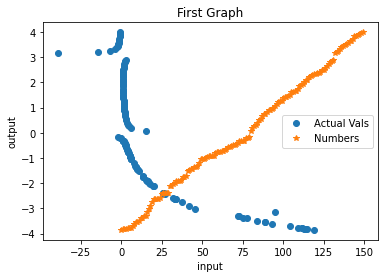

In [ ]:
# 4 System.out.println("Hello plot!!!"); (☞ﾟヮﾟ)☞
plt.plot(outputValues,inputValues,'o',label='Actual Vals')
plt.plot(inputValues,'*',label='Numbers')
plt.legend(loc='best')
plt.xlabel ('input')
plt.ylabel ('output')
plt.title('First Graph')

plt.show()
plt.savefig("originalValues")

In [ ]:
# 5 Noisy noisy numbies
noisyOutputValues = outputValues+\
 np.random.lognormal(3, 1, 150)
# noisyOutputValues

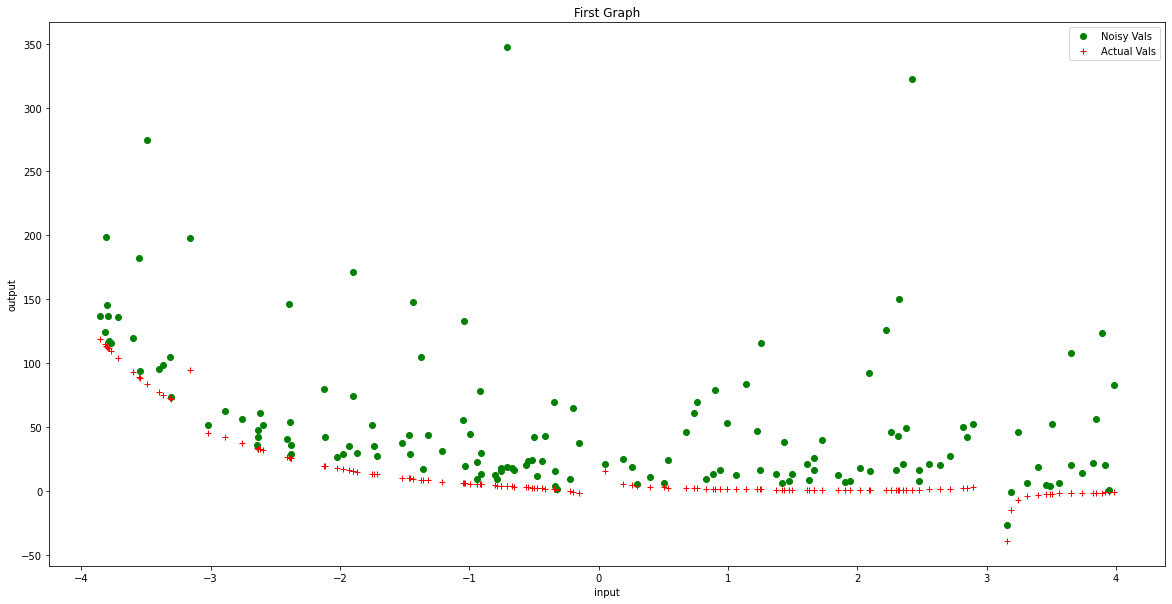

In [ ]:
plt.figure(figsize= (20,10))
plt.plot(inputValues,noisyOutputValues,'og',label='Noisy Vals')
plt.plot(inputValues,outputValues,'+r',label='Actual Vals')
plt.legend(loc='best')
plt.xlabel ('input')
plt.ylabel ('output')
plt.title('First Graph')

plt.show()
plt.savefig("NoisyValues")

In [ ]:
# 6 Does it fit? (idk)
bestValsCustModel, CoVarCustModel =\
 opt.curve_fit(myCustFunc,inputValues,noisyOutputValues)
print(bestValsCustModel)

[3.77928279 0.83971404]


In [ ]:
# 7 A fourth degree polynomial function :)
def poly4thdegree(x,a,b,c,d,e):
  return a*(x**4)+b*(x**3)+c*(x**2)+d*x+e

In [ ]:
# 8 Value Prediction through MAGIC
custModelPredictedOutcomes = \
  myCustFunc(inputValues,bestValsCustModel[0],bestValsCustModel[1])


#  Fitting again
bestValsPolModel, CoVarPolModel =\
 opt.curve_fit(poly4thdegree,inputValues,noisyOutputValues)
print(bestValsPolModel)

# Predicting again
polyModelPredictedOutcomes =\
 poly4thdegree(inputValues,bestValsPolModel[0],bestValsPolModel[1],\
               bestValsPolModel[2],bestValsPolModel[3],bestValsPolModel[4])

[ 0.11799206 -0.97923217  2.18721401  0.11051382 36.84485306]


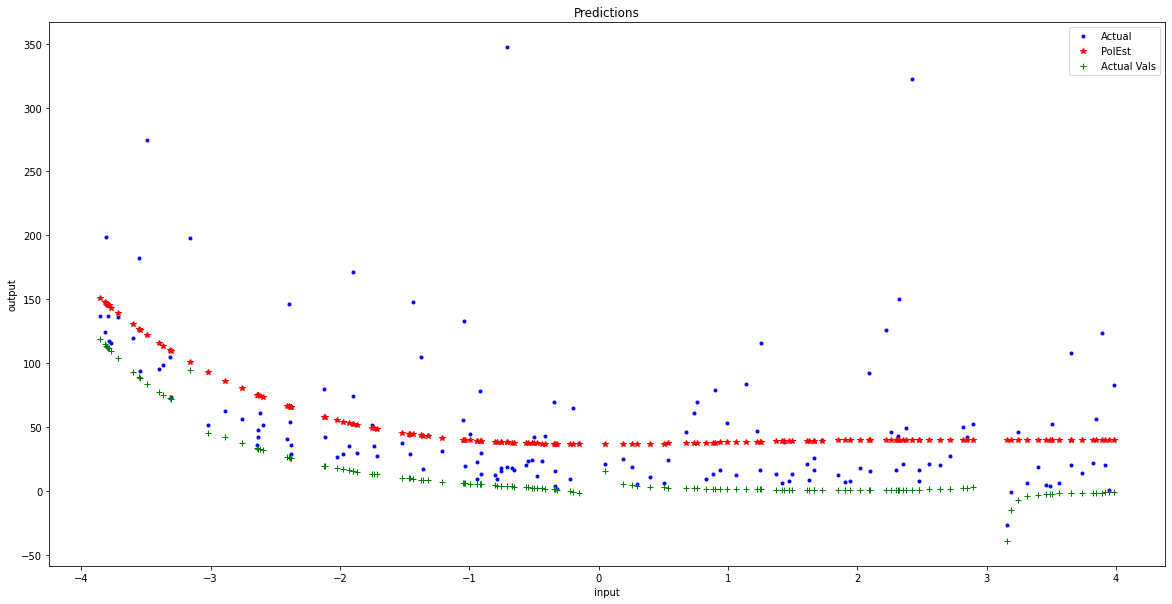

In [ ]:
# 9 plt.plot.plot.plot.plot...(a)
plt.figure(figsize= (20,10))
plt.plot(inputValues,noisyOutputValues, 'b.', label='Actual')
plt.plot(inputValues,polyModelPredictedOutcomes, 'r*', label='PolEst')
plt.plot(inputValues,outputValues,'+g',label='Actual Vals')
plt.xlabel ('input')
plt.ylabel ('output')
plt.title ('Predictions')
plt.legend(loc='best')
plt.show()
plt.savefig("CustFunctionPreds")

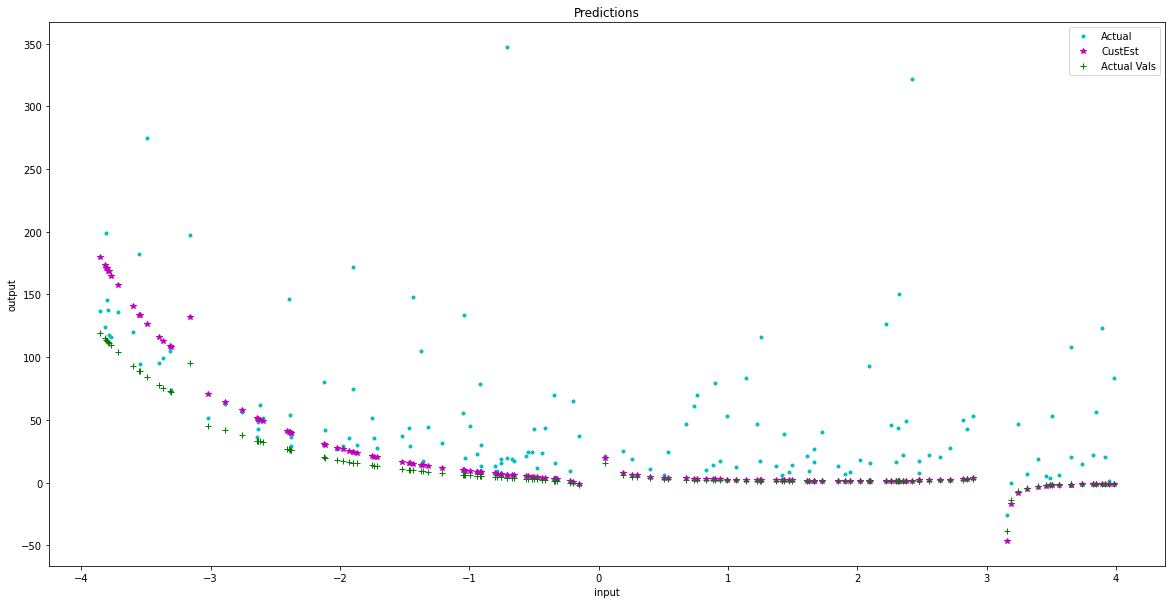

In [ ]:
# 9 plt.plot.plot.plot.plot...(b)
plt.figure(figsize= (20,10))
plt.plot(inputValues,noisyOutputValues, 'c.', label='Actual')
plt.plot(inputValues,custModelPredictedOutcomes, 'm*', label='CustEst')
# plt.plot(inputValues,polyModelPredictedOutcomes, 'r*', label='PolEst')
plt.plot(inputValues,outputValues,'g+',label='Actual Vals')
plt.xlabel ('input')
plt.ylabel ('output')
plt.title ('Predictions')
plt.legend(loc='best')
plt.show()
plt.savefig("PolyFunctionPreds")

In [ ]:
# 10 errors :(
meanAbsErr_actual= mean_absolute_error(outputValues,noisyOutputValues)
meanAbsErr_cust= mean_absolute_error(noisyOutputValues,custModelPredictedOutcomes)
meanAbsErr_poly= mean_absolute_error(noisyOutputValues,polyModelPredictedOutcomes)

meanSqErr_actual = mean_squared_error(outputValues,noisyOutputValues)
meanSqErr_cust = mean_squared_error(noisyOutputValues,custModelPredictedOutcomes)
meanSqErr_poly = mean_squared_error(noisyOutputValues,polyModelPredictedOutcomes)

In [ ]:
# 10
print('the noisy scores are:',\
      'MAE: {:.2f}'.format(meanAbsErr_actual),\
      'MSQE: {:.2f}'.format(meanSqErr_actual))

the noisy scores are: MAE: 37.38 MSQE: 3821.33


In [ ]:
# 10
print('the custom function scores are:',
      'MAE: {:.2f}'.format(meanAbsErr_cust),
      'MSQE: {:.2f}'.format(meanSqErr_cust) )

the custom function scores are: MAE: 35.15 MSQE: 3512.52


In [ ]:
# 10
print('the polynomial function scores are:',\
      'MAE: {:.2f}'.format(meanAbsErr_poly),\
      'MSQE: {:.2f}'.format(meanSqErr_poly))

the polynomial function scores are: MAE: 31.45 MSQE: 2493.69


2ο Μέρος

In [ ]:
inputValues = inputValues.reshape(-1,1)
outputValues = outputValues.reshape(-1,1)

In [ ]:
# Splitting the data
trainDatPerc = 0.7
valDatPerc = trainDatPerc/10
testDatPec = 1 - trainDatPerc - valDatPerc

indices = np.random.permutation(len(inputValues))
trainInd = indices[0:int(trainDatPerc*len(indices))]
valInd = indices[int(trainDatPerc*len(indices)+1):\
                 int((trainDatPerc+valDatPerc)*len(indices))]
testInd = indices[int((trainDatPerc+valDatPerc)*len(indices))+1:]

In [ ]:
# initializing the knn model
knnReg = KNeighborsRegressor(n_neighbors=30)

# Fit the model
knnReg.fit(inputValues[trainInd],outputValues[trainInd])

KNeighborsRegressor(n_neighbors=30)

In [ ]:
# Initialize a model with rbf kernel
# svmReg =SVR(kernel='rbf')
svmReg = SVR(kernel = 'poly', degree = 1, gamma = 'auto')

# Fit the model
svmReg.fit(inputValues[trainInd],outputValues[trainInd])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=1, gamma='auto', kernel='poly')

In [ ]:
# Gaussian process regression initialization
gprReg = GPR()

gprReg.fit(inputValues[trainInd],outputValues[trainInd])

GaussianProcessRegressor()

In [ ]:
# Predicting with the regressors (train data)
predictedOutputsknn = knnReg.predict(inputValues[trainInd])
predictedOutputssvm = svmReg.predict(inputValues[trainInd])
predictedOutputsgpr = gprReg.predict(inputValues[trainInd])

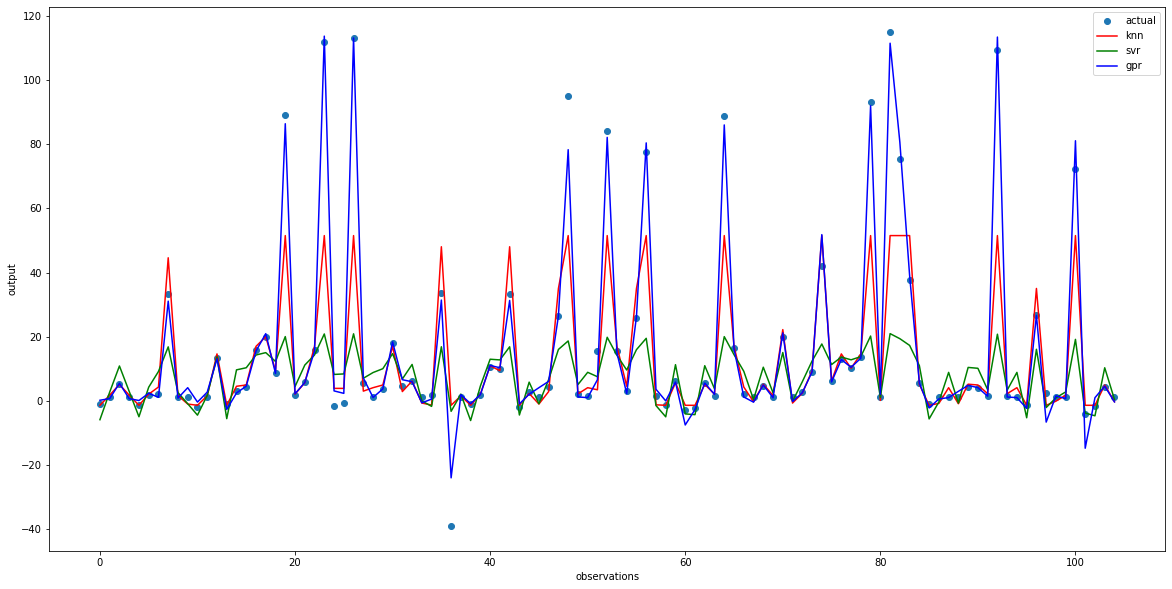

In [ ]:
# plotting the results
plt.figure(figsize=(20, 10))
plt.plot(outputValues[trainInd],'o', label = 'actual')
plt.plot(predictedOutputsknn,'r-', label = 'knn')
plt.plot(predictedOutputssvm,'g-', label = 'svr')
plt.plot(predictedOutputsgpr,'b-', label = 'gpr')
plt.legend(loc='best')
plt.xlabel ('observations')
plt.ylabel ('output')
plt.show()
plt.savefig("TrainDataRegressionPArt2-4")

In [ ]:
# Test set predictions
testPredictedOutputsknn = knnReg.predict(inputValues[testInd])
testPredictedOutputssvm = svmReg.predict(inputValues[testInd])
testPredictedOutputsgpr = gprReg.predict(inputValues[testInd])

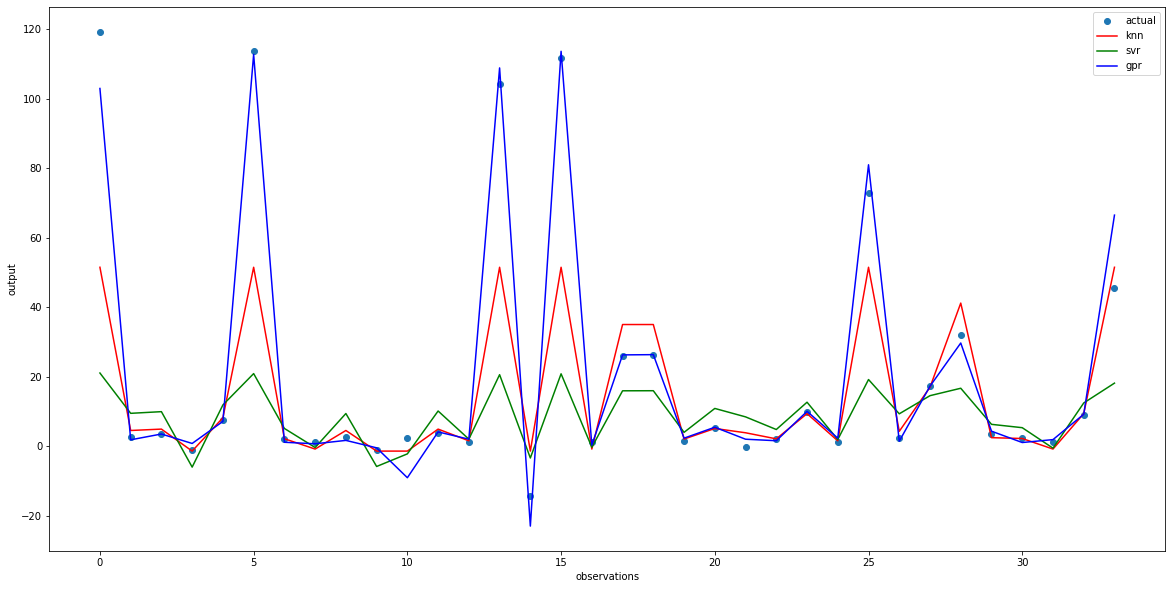

In [ ]:
# plotting the test results
plt.figure(figsize=(20, 10))
plt.plot(outputValues[testInd],'o', label = 'actual')
plt.plot(testPredictedOutputsknn,'r-', label = 'knn')
plt.plot(testPredictedOutputssvm,'g-', label = 'svr')
plt.plot(testPredictedOutputsgpr,'b-', label = 'gpr')
plt.legend(loc='best')
plt.xlabel ('observations')
plt.ylabel ('output')
plt.show()
plt.savefig("TestDataRegressionPArt2-4")

In [ ]:
# calculate the scores
mae_knn = mean_absolute_error(noisyOutputValues[testInd], testPredictedOutputsknn)
rmse_knn = np.sqrt(mean_squared_error(noisyOutputValues[testInd],\
                                      testPredictedOutputsknn))
max_knn = max_error(noisyOutputValues[testInd], testPredictedOutputsknn)


mae_svm = mean_absolute_error(noisyOutputValues[testInd], testPredictedOutputssvm)
rmse_svm = np.sqrt(mean_squared_error(noisyOutputValues[testInd],\
                                      testPredictedOutputssvm))
max_svm = max_error(noisyOutputValues[testInd], testPredictedOutputssvm)


mae_gpr = mean_absolute_error(noisyOutputValues[testInd], testPredictedOutputsgpr)
rmse_gpr = np.sqrt(mean_squared_error(noisyOutputValues[testInd],\
                                      testPredictedOutputsgpr))
max_gpr = max_error(noisyOutputValues[testInd], testPredictedOutputsgpr)

In [ ]:
#print them scores on screen
print('the knn regresor (test) scores are:',\
      'MAE: {:.2f}'.format(mae_knn),\
      'RMSE: {:.2f}'.format(rmse_knn),\
      'max error: {:.2f}'.format(max_knn))

print('the svm regresor (test) scores are:',\
      'MAE: {:.2f}'.format(mae_svm),\
      'RMSE: {:.2f}'.format(rmse_svm),\
      'max error: {:.2f}'.format(max_svm))

print('the gpr regresor (test) scores are:',\
      'MAE: {:.2f}'.format(mae_gpr),\
      'RMSE: {:.2f}'.format(rmse_gpr),\
      'max error: {:.2f}'.format(max_gpr))

the knn regresor (test) scores are: MAE: 43.62 RMSE: 62.50 max error: 150.83
the svm regresor (test) scores are: MAE: 49.26 RMSE: 69.95 max error: 178.09
the gpr regresor (test) scores are: MAE: 37.83 RMSE: 53.83 max error: 149.32


In [ ]:
# Can we normalize the data and stop judging them for being data?

scaler_inputs = MinMaxScaler()
normalized = scaler_inputs.fit_transform(inputValues)
normalizedOutputs = scaler_inputs.fit_transform(outputValues)

In [ ]:
# outputValues

In [ ]:
# Splitting the data again
trainDatPerc = 0.7
valDatPerc = trainDatPerc/10
testDatPec = 1 - trainDatPerc - valDatPerc

indices = np.random.permutation(len(normalized))
trainInd = indices[0:int(trainDatPerc*len(indices))]
valInd = indices[int(trainDatPerc*len(indices)+1):\
                 int((trainDatPerc+valDatPerc)*len(indices))]
testInd = indices[int((trainDatPerc+valDatPerc)*len(indices))+1:]

In [ ]:
# initializing the knn model
knnRegNrml = KNeighborsRegressor(n_neighbors=30)

# Fit the model
knnRegNrml.fit(normalized[trainInd],normalizedOutputs[trainInd])

KNeighborsRegressor(n_neighbors=30)

In [ ]:
# Initialize a model with rbf kernel
svmRegNrml = SVR(kernel = 'poly', gamma = 'auto', degree = 1)

# Fit the model
svmRegNrml.fit(normalized[trainInd],normalizedOutputs[trainInd])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=1, gamma='auto', kernel='poly')

In [ ]:
# Gaussian process regression initialization
gprRegNrml = GPR()

gprRegNrml.fit(normalized[trainInd],normalizedOutputs[trainInd])

GaussianProcessRegressor()

In [ ]:
# Predicting with the regressors (train data)
predictedOutputsknnNrml = knnRegNrml.predict(normalized[trainInd])
predictedOutputssvmNrml = svmRegNrml.predict(normalized[trainInd]).reshape(-1,1)
predictedOutputsgprNrml = gprRegNrml.predict(normalized[trainInd])

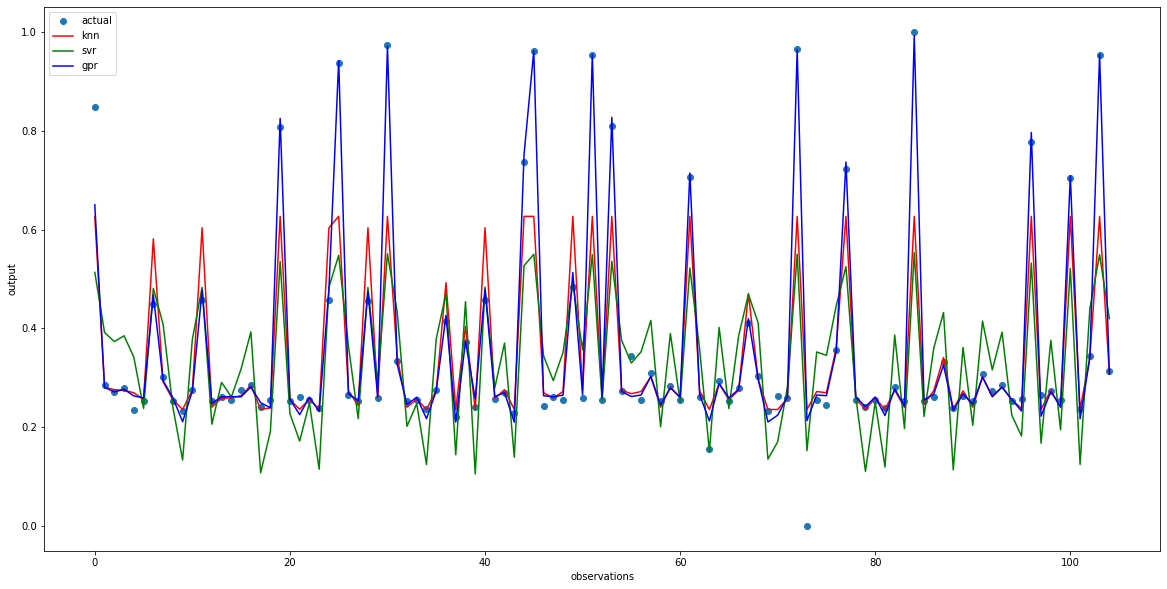

In [ ]:
# plotting the results
plt.figure(figsize=(20, 10)) # define size to better illustrate results
plt.plot(normalizedOutputs[trainInd],'o', label = 'actual')
plt.plot(predictedOutputsknnNrml,'r-', label = 'knn')
plt.plot(predictedOutputssvmNrml,'g-', label = 'svr')
plt.plot(predictedOutputsgprNrml,'b-', label = 'gpr')
plt.legend(loc='best')
plt.xlabel ('observations')
plt.ylabel ('output')
plt.show()
plt.savefig("TrainDataRegressionPArt2-5")

In [ ]:
# Predicting with the regressors (train data)
testPredictedOutputsknnNrml =  knnRegNrml.predict(normalized[testInd])
testPredictedOutputssvmNrml =  svmRegNrml.predict(normalized[testInd]).reshape(-1,1)
testPredictedOutputsgprNrml =  gprRegNrml.predict(normalized[testInd])

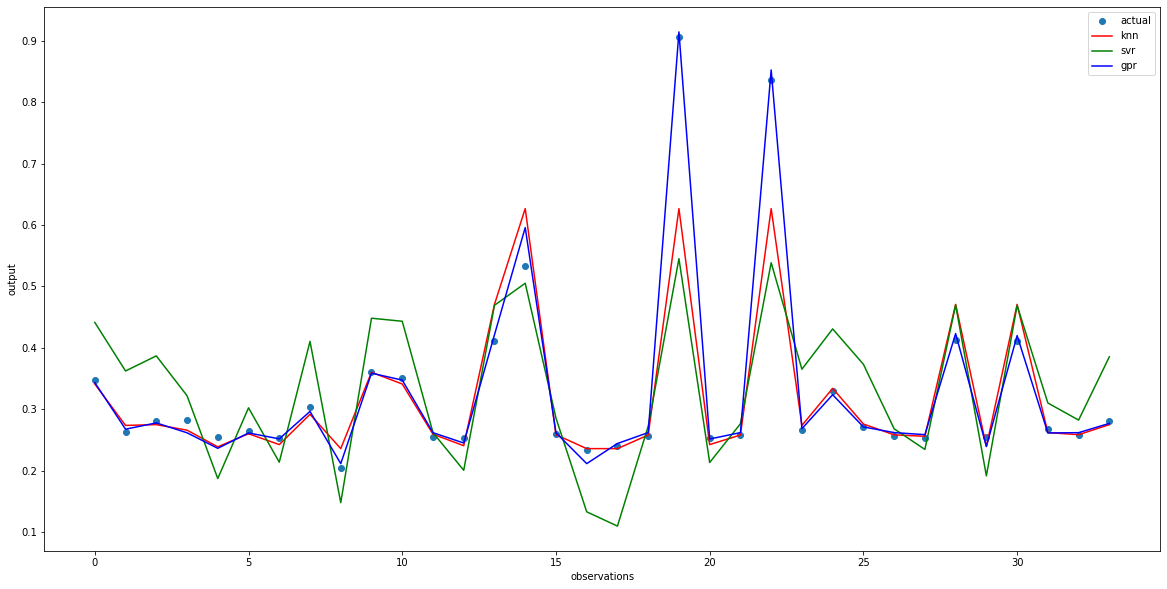

In [ ]:
# plotting the results for one last time
plt.figure(figsize=(20, 10)) # define size to better illustrate results
plt.plot(normalizedOutputs[testInd],'o', label = 'actual')
plt.plot(testPredictedOutputsknnNrml,'r-', label = 'knn')
plt.plot(testPredictedOutputssvmNrml,'g-', label = 'svr')
plt.plot(testPredictedOutputsgprNrml,'b-', label = 'gpr')
plt.legend(loc='best')
plt.xlabel ('observations')
plt.ylabel ('output')
plt.show()
plt.savefig("TestDataRegressionPArt2-5")

In [ ]:
# GOALGOALGOALGOALGOAL (Joke about the scores     (☞ﾟヮﾟ)☞     )
mae_knnNrml = mean_absolute_error(noisyOutputValues[testInd], testPredictedOutputsknnNrml)
rmse_knnNrml = np.sqrt(mean_squared_error(noisyOutputValues[testInd],\
                                      testPredictedOutputsknnNrml))
max_knnNrml = max_error(noisyOutputValues[testInd], testPredictedOutputsknnNrml)


mae_svmNrml = mean_absolute_error(noisyOutputValues[testInd], testPredictedOutputssvmNrml)
rmse_svmNrml = np.sqrt(mean_squared_error(noisyOutputValues[testInd],\
                                      testPredictedOutputssvmNrml))
max_svmNrml = max_error(noisyOutputValues[testInd], testPredictedOutputssvmNrml)


mae_gprNrml = mean_absolute_error(noisyOutputValues[testInd], testPredictedOutputsgprNrml)
rmse_gprNrml = np.sqrt(mean_squared_error(noisyOutputValues[testInd],\
                                      testPredictedOutputsgprNrml))
max_gprNrml = max_error(noisyOutputValues[testInd], testPredictedOutputsgprNrml)

In [ ]:
# print(print(print(print(print(":)")))))
print('the knn regresor (test) scores are:',\
      'MAE: {:.2f}'.format(mae_knnNrml),\
      'RMSE: {:.2f}'.format(rmse_knnNrml),\
      'max error: {:.2f}'.format(max_knnNrml))

print('the svm regresor (test) scores are:',\
      'MAE: {:.2f}'.format(mae_svmNrml),\
      'RMSE: {:.2f}'.format(rmse_svmNrml),\
      'max error: {:.2f}'.format(max_svmNrml))

print('the gpr regresor (test) scores are:',\
      'MAE: {:.2f}'.format(mae_gprNrml),\
      'RMSE: {:.2f}'.format(rmse_gprNrml),\
      'max error: {:.2f}'.format(max_gprNrml))

the knn regresor (test) scores are: MAE: 59.03 RMSE: 89.33 max error: 347.10
the svm regresor (test) scores are: MAE: 59.02 RMSE: 89.32 max error: 347.00
the gpr regresor (test) scores are: MAE: 59.03 RMSE: 89.31 max error: 347.10
